# Auto mpg

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. data

In [3]:
data = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Data_TIL\Practice\data\auto-mpg.csv'
df_mpg = pd.read_csv(data)
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 2. data preprocessing

In [6]:
df_mpg = df_mpg.drop(['car_name', 'origin', 'horsepower'], axis=1)
df_mpg.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


### 3. LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_mpg.drop('mpg', axis=1)
Y = df_mpg['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [8]:
lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
pred = lr.predict(X_test)

In [15]:
mse = mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)
r2_score = r2_score(Y_test, pred)

print("MSE:", mse, "RMSE:", rmse)
print("R^2(Variance score):", r2_score)

MSE: 9.930232572802668 RMSE: 3.1512271534757166
R^2(Variance score): 0.8269733998301931


In [16]:
print("Y 절편:", np.round(lr.intercept_, 2))
print("회귀 계수 값:", np.round(lr.coef_, 2))

Y 절편: -18.63
회귀 계수 값: [ 0.24 -0.01 -0.01  0.07  0.79]


In [17]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.79
cylinders       0.24
acceleration    0.07
displacement   -0.01
weight         -0.01
dtype: float64

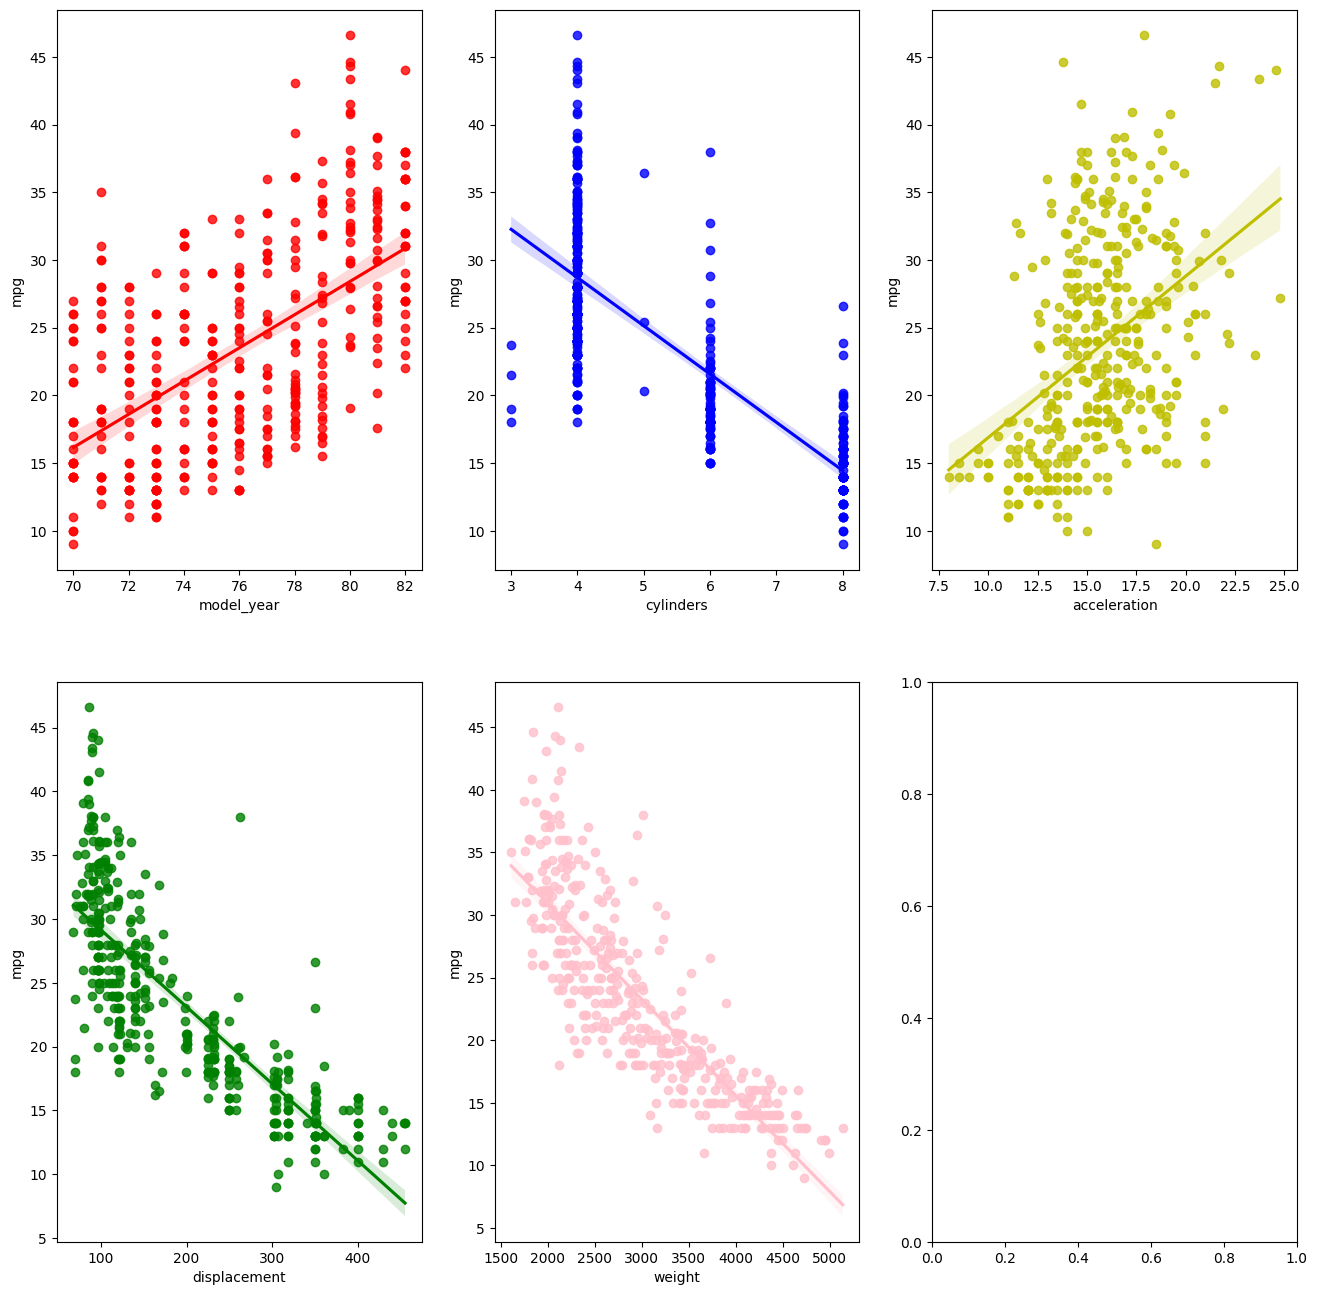

In [21]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
X_features = ['model_year', 'cylinders', 'acceleration', 'displacement', 'weight']
plot_color = ['r', 'b', 'y', 'g', 'pink']

for i, feature in enumerate(X_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=df_mpg, ax=axs[row][col], color=plot_color[i])

In [23]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

car_info = list(map(int, input().split()))

mpg_predict = lr.predict([car_info])

print("이 자동차의 예상 연비(mpg)는", mpg_predict,"입니다.")

연비를 예측하고 싶은 차의 정보를 입력해주세요.
이 자동차의 예상 연비(mpg)는 [14.98475137] 입니다.


c:\Users\jjjun_ii\anaconda3\envs\LikeLion\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
